In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#import data into dataframe
#data at https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Employee+Churn+in+Python/HR_comma_sep.csv
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


No null values or missing values observed.

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [35]:
df['Departments '].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments , dtype: int64

In [38]:
left = df.groupby('left')
left.describe()

Work_accident                                               \
             count      mean       std  min  25%  50%  75%  max   
left                                                              
0          11428.0  0.175009  0.379991  0.0  0.0  0.0  0.0  1.0   
1           3571.0  0.047326  0.212364  0.0  0.0  0.0  0.0  1.0   

     average_montly_hours              ...  satisfaction_level        \
                    count        mean  ...                 75%   max   
left                                   ...                             
0                 11428.0  199.060203  ...                0.84  1.00   
1                  3571.0  207.419210  ...                0.73  0.92   

     time_spend_company                                                
                  count      mean       std  min  25%  50%  75%   max  
left                                                                   
0               11428.0  3.380032  1.562348  2.0  2.0  3.0  4.0  10.0  
1                3571.0  3.876505  0.977698  2.0  3.0  4.0  5.0   6.0  

[2 rows x 56 columns]

In [39]:
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [42]:
dept_df = df.groupby(['Departments ', 'left'], as_index=False)
dept_df.mean()

,Departments,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,IT,0,0.677170,0.713050,3.756813,198.886792,3.356394,0.162474,0.000000
1,IT,1,0.411868,0.730037,4.025641,213.849817,3.860806,0.032967,0.010989
2,RandD,0,0.653799,0.706081,3.822823,198.951952,3.252252,0.186186,0.040541
3,RandD,1,0.432810,0.745372,4.024793,210.975207,4.000000,0.082645,0.000000
4,accounting,0,0.647211,0.726128,3.808171,199.037300,3.424512,0.154529,0.024867
5,accounting,1,0.402598,0.694510,3.872549,207.029412,3.794118,0.044118,0.000000
6,hr,0,0.666679,0.720802,3.702290,199.250000,3.192748,0.156489,0.028626
7,hr,1,0.433395,0.679721,3.539535,197.306977,3.753488,0.032558,0.000000
8,management,0,0.654861,0.723451,3.812616,200.233766,4.395176,0.181818,0.122449
9,management,1,0.422857,0.727253,4.142857,207.263736,3.758242,0.054945,0.032967


## Visualizations

In [44]:
attrition = df.groupby('left').count()

<Container object of 2 artists>

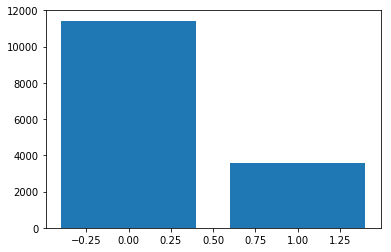

In [48]:
plt.bar(attrition.index.values, attrition['satisfaction_level'])
plt.xlabel('Attrition of Employees')
plt.ylabel('Count')

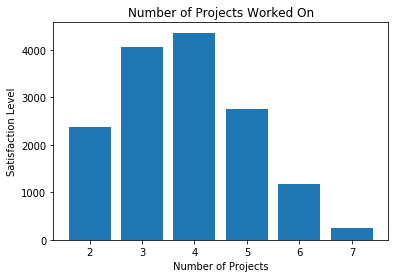

In [53]:
projects = df.groupby('number_project').count()
plt.bar(projects.index.values, projects['satisfaction_level']);
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.title('Number of Projects Worked On');

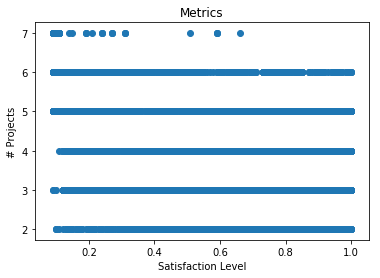

In [60]:
plt.scatter(df['satisfaction_level'], df['number_project']);
plt.xlabel('Satisfaction Level')
plt.ylabel('# Projects')
plt.title('Metrics');

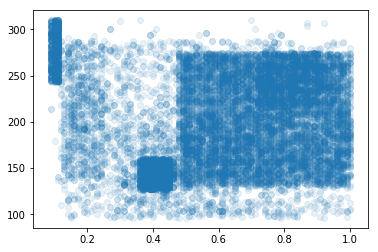

In [62]:
plt.scatter(df['satisfaction_level'], df['average_montly_hours'], alpha=0.1);

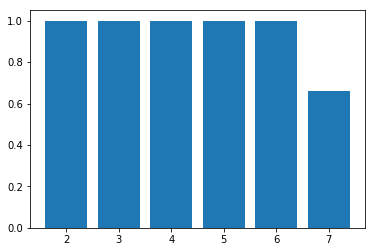

In [70]:
fig, ax = plt.subplots()
ax.bar(df['number_project'], df['satisfaction_level'])
plt.show();

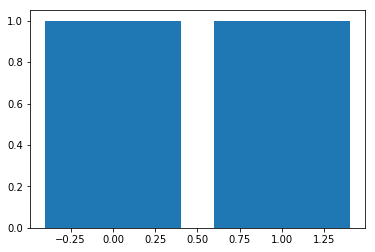

In [74]:
fig, ax = plt.subplots()
ax.bar(df['left'], df['promotion_last_5years'])
plt.show();

### Tableau Visualizations 
- Story and vizzes at https://public.tableau.com/views/EmployeeChurn_0/EmployeeChurn?:embed=y&:display_count=yes
